# ===== IMPORT LIBRARIES =====

In [1]:
import pandas as pd
import seaborn as sns
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


# ===== LOAD DATASET =====

In [2]:
df = pd.read_csv('dataset/used_cars.csv')
print("✅ Dataset berhasil diload!")
print(f"Shape awal: {df.shape}")

✅ Dataset berhasil diload!
Shape awal: (4009, 12)


# ===== STATISTIK DESKRIPTIF =====

In [3]:
print("📊 Statistik Deskriptif")
numeric_cols = ['model_year']

desc_stats = df[numeric_cols].describe().round(2)
desc_stats.loc['Q1'] = df[numeric_cols].quantile(0.25)
desc_stats.loc['Q2'] = df[numeric_cols].quantile(0.5)
desc_stats.loc['Q3'] = df[numeric_cols].quantile(0.75)

desc_stats = desc_stats.reindex(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print("Statistik Deskriptif untuk Atribut Numerik:")
print(desc_stats)

📊 Statistik Deskriptif
Statistik Deskriptif untuk Atribut Numerik:
       model_year
count     4009.00
mean      2015.52
std          6.10
min       1974.00
25%       2012.00
50%       2017.00
75%       2020.00
max       2024.00


# ===== MENAMPILKAN 10 RECORD PERTAMA =====

In [4]:
print("\n10 Record Pertama (Atribut Numerik):")
print(df[numeric_cols].head(10))


10 Record Pertama (Atribut Numerik):
   model_year
0        2013
1        2021
2        2022
3        2015
4        2021
5        2016
6        2017
7        2001
8        2021
9        2020


# ====== MENAMPILKAN INFORMASI DATASET (jumlah record, jumlah atribut, nama atribut, tipe angka) =====

In [5]:
print("\nInformasi Dataset:")
print(f"Jumlah Record: {df.shape[0]}")
print(f"Jumlah Attribute: {df.shape[1]}")
print(f"Nama Attribute: {list(df.columns)}")
print(f"Jumlah Attribute Numerik: {len(numeric_cols)}")
print(f"Attribute Bertipe Angka: {numeric_cols}")


Informasi Dataset:
Jumlah Record: 4009
Jumlah Attribute: 12
Nama Attribute: ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Jumlah Attribute Numerik: 1
Attribute Bertipe Angka: ['model_year']


# ===== MENAMPILKAN JUMLAH LABEL UNTUK ATRIBUT OBJEK =====

In [6]:
object_cols = df.select_dtypes(include='object').columns

print("\nJumlah Label per Atribut Object:")
for col in object_cols:
    print(f"{col}: {df[col].nunique()} nilai unik")


Jumlah Label per Atribut Object:
brand: 57 nilai unik
model: 1898 nilai unik
milage: 2818 nilai unik
fuel_type: 7 nilai unik
engine: 1146 nilai unik
transmission: 62 nilai unik
ext_col: 319 nilai unik
int_col: 156 nilai unik
accident: 2 nilai unik
clean_title: 1 nilai unik
price: 1569 nilai unik


# ===== DATA CLEANING =====
# Hapus karakter non-numerik dari kolom price dan milage, lalu konversi ke float

In [7]:
print("1. 🧹 Cleaning Data...")

# Price cleaning
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)

# Milage cleaning  
df['milage'] = df['milage'].str.replace('mi.', '', regex=False)
df['milage'] = df['milage'].str.replace(',', '', regex=False)
df['milage'] = df['milage'].astype(float)

print("Cleaning Data Format String Selesai ✅")

print(f"Price dtype: {df['price'].dtype}")
print(f"Milage dtype: {df['milage'].dtype}")
print(f"Sample price: {df['price'].head(3).tolist()}")
print(f"Sample milage: {df['milage'].head(3).tolist()}")

# 1.1 Handling Missing Values
print("\n🔍 Handling Missing Values:")
print("Sebelum handling:")
print(df.isnull().sum())

numerical_cols = ['model_year', 'milage', 'price']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✅ Missing values numerik di {col} diisi dengan median: {median_val}")

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"✅ Missing values kategorikal di {col} diisi dengan modus: {mode_val}")

print("\nSetelah handling:")
print(df.isnull().sum())

# 1.2 Handling Duplicate Values
print(f"\n🔍 Handling Duplicate Values:")
print(f"Jumlah duplikat sebelum: {df.duplicated().sum()}")

df = df.drop_duplicates()
print(f"Jumlah duplikat setelah: {df.duplicated().sum()}")
print(f"Shape setelah hapus duplikat: {df.shape}")


## 1.3 Handling Outliers
print(f"\n🔍 Handling Outliers:")

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum()

print("Jumlah outliers sebelum handling:")
for col in numeric_cols:
    outlier_count = detect_outliers_iqr(df[col])
    print(f"{col}: {outlier_count} outliers")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = nm.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = nm.where(df[col] > upper_bound, upper_bound, df[col])

print("\nJumlah outliers setelah handling:")
for col in numeric_cols:
    outlier_count = detect_outliers_iqr(df[col])
    print(f"{col}: {outlier_count} outliers")

1. 🧹 Cleaning Data...
Cleaning Data Format String Selesai ✅
Price dtype: float64
Milage dtype: float64
Sample price: [10300.0, 38005.0, 54598.0]
Sample milage: [51000.0, 34742.0, 22372.0]

🔍 Handling Missing Values:
Sebelum handling:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64
✅ Missing values kategorikal di fuel_type diisi dengan modus: Gasoline
✅ Missing values kategorikal di accident diisi dengan modus: None reported
✅ Missing values kategorikal di clean_title diisi dengan modus: Yes

Setelah handling:
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

🔍 Handling Duplicate Values:
Jumlah duplikat sebel

Pada data cleaning disini terdapat beberapa tahapan, yaitu
1. Pembersihan format data
Pemeriksaan tipe data mengungkapkan bahwa kolom 'price' dan 'milage' masih disimpan sebagai string dengan karakter khusus:
Kolom 'price': mengandung simbol $ dan koma (contoh: $15,000)
Kolom 'milage': mengandung teks 'mi.' dan koma (contoh: 45,000 mi.)

2. Penanganan Data yang hilang (missing values)
Pemeriksaan dataset mengungkapkan adanya nilai kosong dalam beberapa kolom. Diterapkan strategi penanganan berdasarkan tipe data:
Data numerik (model_year, milage, price): diisi dengan nilai median
Data kategorikal: diisi dengan nilai modus (nilai paling sering muncul)

Pemilihan median untuk data numerik didasarkan pada ketahanannya terhadap outlier, sedangkan modus untuk data kategorikal menjaga distribusi kategori asli.

3. Penanganan Data Duplikat
Terdapat beberapa entri duplikat dalam dataset. Data duplikat dihapus untuk:
    1)Mencegah bias dalam analisis statistik
    2)Menghindari overfitting pada model machine learning
    3)Mengoptimalkan penggunaan memori dan waktu komputasi

5. Penanganan Outlier
Outlier dideteksi menggunakan metode Interquartile Range (IQR).
Nilai di luar batas IQR di-cap ke nilai terdekat (bawah atau atas) untuk mempertahankan ukuran sampel sementara mengurangi dampak outlier ekstrem.

# ===== NORMALISASI =====

In [8]:
print("2. Normalisasi")
# Simpan data asli untuk perbandingan
original_numeric = df[numeric_cols].copy()

# StandardScaler untuk normalisasi
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ Normalisasi dengan StandardScaler selesai")
print("\nStatistik sebelum normalisasi:")
print(original_numeric.describe().round(2))
print("\nStatistik setelah normalisasi:")
print(df[numeric_cols].describe().round(2))

2. Normalisasi
✅ Normalisasi dengan StandardScaler selesai

Statistik sebelum normalisasi:
       model_year
count     4009.00
mean      2015.58
std          5.89
min       2000.00
25%       2012.00
50%       2017.00
75%       2020.00
max       2024.00

Statistik setelah normalisasi:
       model_year
count     4009.00
mean         0.00
std          1.00
min         -2.64
25%         -0.61
50%          0.24
75%          0.75
max          1.43


Normalisasi menggunakan StandardScaler
Data numerik dalam dataset memiliki skala yang sangat berbeda:
    1)Harga: ribuan hingga puluhan ribu
    2)Mileage: puluhan ribu hingga ratusan ribu
    3)Tahun model: ribuan

Perbedaan skala ini dapat menyebabkan model machine learning memberikan bobot berlebihan pada fitur dengan nilai besar.

Hasil standardisasi:
Mean setiap fitur: 0
Standard deviation: 1
Semua fitur numerik berada dalam skala yang sebanding

# ===== ENCODING KOLOM KATEGORIKAL =====

In [9]:
print("3. Encoding Kolom Kategorikal")

categorical_cols = df.select_dtypes(include='object').columns
print(f"Kolom kategorikal: {list(categorical_cols)}")

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() > 10:
        df[f'{col}_encoded'] = label_encoder.fit_transform(df[col])
        print(f"✅ Label Encoding untuk {col}: {df[col].nunique()} kategori")
    else:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        print(f"✅ One-Hot Encoding untuk {col}: {df[col].nunique()} kategori")

# Hapus kolom kategorikal ori
df = df.drop(columns=categorical_cols)
print(f"\nShape setelah encoding: {df.shape}")

3. Encoding Kolom Kategorikal
Kolom kategorikal: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
✅ Label Encoding untuk brand: 57 kategori
✅ Label Encoding untuk model: 1898 kategori
✅ One-Hot Encoding untuk fuel_type: 7 kategori
✅ Label Encoding untuk engine: 1146 kategori
✅ Label Encoding untuk transmission: 62 kategori
✅ Label Encoding untuk ext_col: 319 kategori
✅ Label Encoding untuk int_col: 156 kategori
✅ One-Hot Encoding untuk accident: 2 kategori
✅ One-Hot Encoding untuk clean_title: 1 kategori

Shape setelah encoding: (4009, 19)


Data kategorikal seperti merek mobil, tipe bahan bakar, dan transmisi perlu dikonversi ke format numerik untuk pemrosesan lebih lanjut.

Strategi encoding yang digunakan:
1) Label Encoding
   Digunakan untuk variabel dengan banyak kategori (>10)
3) One-Hot Encoding
   Digunakan untuk variabel dengan sedikit kategori

Setelah proses encoding, kolom kategorikal asli dihapus dari dataset.

# ===== FEATURE ENGINEERING =====

In [10]:
print("4. Feature Engineering")

# Karena kita sudah melakukan normalisasi, kita perlu inverse transform sementara
# untuk membuat feature yang meaningful
df_temp = df.copy()
df_temp[numeric_cols] = scaler.inverse_transform(df_temp[numeric_cols])

# Feature 1: Age of car (tahun sekarang - model_year)
current_year = 2024
df['car_age'] = current_year - df_temp['model_year']
print("✅ Feature 1: car_age (usia mobil) created")

# Feature 2: Price per mile (harga per mil)
df['price_per_mile'] = df_temp['price'] / (df_temp['milage'] + 1)
print("✅ Feature 2: price_per_mile (harga per mil) created")

# Feature 3: Car value category berdasarkan quartile
price_quartiles = df_temp['price'].quantile([0.25, 0.5, 0.75])
def categorize_value(price):
    if price <= price_quartiles[0.25]:
        return 0  # Low 
    elif price <= price_quartiles[0.5]:
        return 1  # Medium
    elif price <= price_quartiles[0.75]:
        return 2  # High
    else:
        return 3  # Premium

df['value_category'] = df_temp['price'].apply(categorize_value)
print("✅ Feature 3: value_category (kategori nilai mobil) created")

print(f"\nFeature baru yang dibuat:")
new_features = ['car_age', 'price_per_mile', 'value_category']
for feature in new_features:
    print(f"- {feature}: {df[feature].nunique()} unique values")

4. Feature Engineering
✅ Feature 1: car_age (usia mobil) created
✅ Feature 2: price_per_mile (harga per mil) created
✅ Feature 3: value_category (kategori nilai mobil) created

Feature baru yang dibuat:
- car_age: 25 unique values
- price_per_mile: 3992 unique values
- value_category: 4 unique values


Dibuat tiga fitur baru untuk meningkatkan kualiyas dataset
1) Usia mobil (car_age)
2) Harga per-mil (price_per_mile)
3) Kategori Nilai (value_category)
   Mobil dikategorikan menjadi empat kelompok berdasarkan kuartil harga:
    0: Harga rendah (kuartil pertama)
    1: Harga menengah (kuartil kedua)
    2: Harga tinggi (kuartil ketiga)
    3: Harga premium (kuartil keempat)

# ===== SPLITTING DATA =====

In [11]:
print("5. Splitting Data")

X = df.drop('price', axis=1) 
y = df['price']  

# Split data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['value_category'] if 'value_category' in df.columns else None
)

print(f"✅ Splitting data selesai:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"Jumlah features: {X_train.shape[1]}")

5. Splitting Data
✅ Splitting data selesai:
Training set: 3207 samples (80.0%)
Testing set: 802 samples (20.0%)
Jumlah features: 21


Dataset dibagi menjadi training set dan testing set dengan rasio 80:20

# ===== DATASET FINAL =====

In [12]:
print("FINAL DATASET INFORMATION")

print(f"Shape final dataset: {df.shape}")
print(f"\nKolom final: {list(df.columns)}")
print(f"\nInfo dataset:")
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"Features setelah preprocessing: {X_train.shape[1]}")

df.to_csv('dataset/used_cars_processed.csv', index=False)
print("\n💾 Dataset yang sudah diproses disimpan sebagai 'used_cars_processed.csv'")

FINAL DATASET INFORMATION
Shape final dataset: (4009, 22)

Kolom final: ['model_year', 'milage', 'price', 'brand_encoded', 'model_encoded', 'fuel_type_Diesel', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–', 'engine_encoded', 'transmission_encoded', 'ext_col_encoded', 'int_col_encoded', 'accident_At least 1 accident or damage reported', 'accident_None reported', 'clean_title_Yes', 'car_age', 'price_per_mile', 'value_category']

Info dataset:
Total samples: 4009
Total features: 22
Features setelah preprocessing: 21

💾 Dataset yang sudah diproses disimpan sebagai 'used_cars_processed.csv'


Setelah melalui seluruh proses preprocessing, dataset yang dihasilkan memiliki karakteristik:
1) Data bersih dari missing values dan duplikat
2) Semua fitur numerik dalam skala terstandarisasi
3) Data kategorikal terkonversi ke format numerik
4) Terdapat fitur tambahan yang meaningful untuk analisis
5) Siap untuk pemodelan machine learning

Dataset akhir disimpan dalam file used_cars_processed.csv untuk penggunaan selanjutnya.



# ===== VISUALISASI DATA =====

📈 Visualisasi Data - Histogram


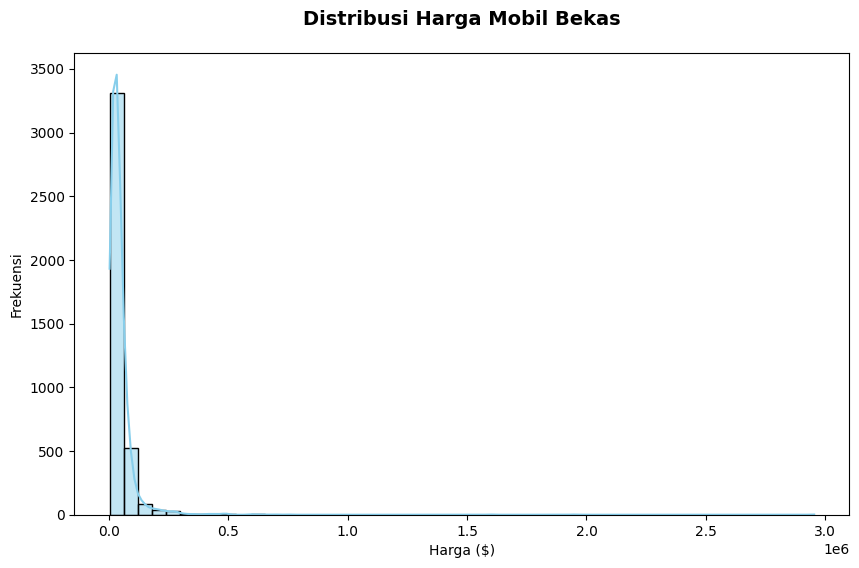

In [13]:
print("📈 Visualisasi Data - Histogram")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Mobil Bekas', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

# ===== HEATMAP KORELASI =====

Heatmap Korelasi Dataset
Matriks Korelasi:
                model_year  milage  price  car_age  price_per_mile  \
model_year           1.000  -0.631  0.204   -1.000           0.115   
milage              -0.631   1.000 -0.306    0.631          -0.135   
price                0.204  -0.306  1.000   -0.204           0.315   
car_age             -1.000   0.631 -0.204    1.000          -0.115   
price_per_mile       0.115  -0.135  0.315   -0.115           1.000   
value_category       0.636  -0.681  0.417   -0.636           0.146   

                value_category  
model_year               0.636  
milage                  -0.681  
price                    0.417  
car_age                 -0.636  
price_per_mile           0.146  
value_category           1.000  


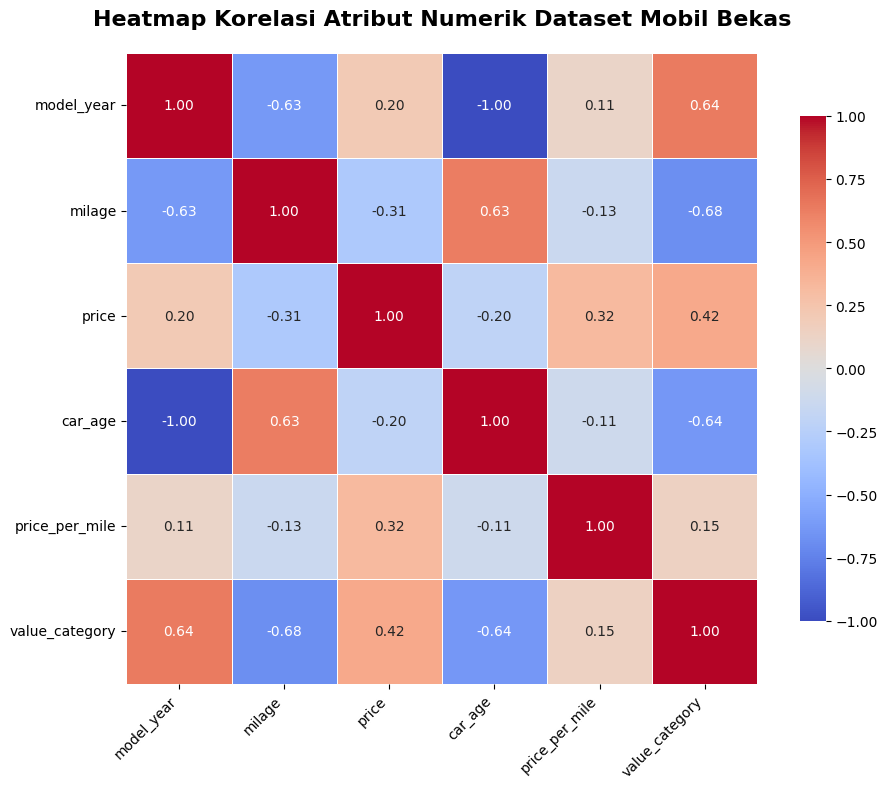


Analisis Korelasi dengan Harga:
----------------------------------------
value_category  :   0.417
price_per_mile  :   0.315
model_year      :   0.204
car_age         :  -0.204
milage          :  -0.306


In [16]:
print("Heatmap Korelasi Dataset")

# Definisikan kolom numerik yang akan dianalisis
numeric_cols = ['model_year', 'milage', 'price', 'car_age', 'price_per_mile', 'value_category']

# Filter hanya kolom yang tersedia dalam dataset
available_numeric_cols = [col for col in numeric_cols if col in df.columns]

# Hitung matriks korelasi
corr_matrix = df[available_numeric_cols].corr()

print("Matriks Korelasi:")
print(corr_matrix.round(3))

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Atribut Numerik Dataset Mobil Bekas', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analisis korelasi dengan target (price)
if 'price' in corr_matrix.columns:
    print("\nAnalisis Korelasi dengan Harga:")
    print("-" * 40)
    price_correlations = corr_matrix['price'].sort_values(ascending=False)
    
    for feature, corr_value in price_correlations.items():
        if feature != 'price':
            print(f"{feature:15} : {corr_value:7.3f}")

### 🔍 HASIL ANALISIS DATA:

# Gambaran Umum Data:
- Dataset berisi 4009 record dan 12 atribut, dengan 3 atribut numerik (model_year, milage, price).

- Rentang harga mobil bekas berkisar dari $2.000.00 hingga $2.954.083.00, dengan rata-rata sekitar $44.553.19.

- Mobil bekas umumnya berasal dari tahun 1974–2024, dengan rata-rata tahun model 2015.

- Jarak tempuh (milage) sangat bervariasi, dari 100 mil hingga 405.000 mil.

- Terdapat korelasi negatif antara milage dan price, artinya mobil dengan jarak tempuh lebih tinggi cenderung lebih murah.

- Distribusi harga miring ke kanan (right-skewed), menunjukkan banyak mobil dengan harga rendah dan beberapa mobil mewah dengan harga sangat tinggi.